In [15]:
from arcgis.gis import GIS
import pandas as pd

from esri_gtfs.utils import 

In [2]:
gis = GIS(profile='transit')

gis

GIS @ https://esritransit.maps.arcgis.com version:2025.2

In [4]:
itm_id = 'c21b595eaf474c1aa0d48bd5ea9adef6'

<Item title:"community_maps_download_contributors" type:Table Layer owner:esri_transit>
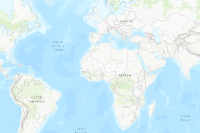

In [5]:
itm = gis.content.get(itm_id)

itm

In [7]:
tbl = gis.content.get(itm_id).tables[0]

tbl

<Table url:"https://services6.arcgis.com/4J5SL9a8ALg9oNpW/arcgis/rest/services/community_maps_download_contributors/FeatureServer/2">

In [8]:
df = tbl.query().df

In [9]:
df

,OBJECTID,ContributorUID,CitationName,ServiceURL,Frequency,NextPull,LastUpdated,GlobalID,POCName,POCEmail,AltPOCName,AltPOCEmail,StartDate
0,47,{851B3232-EFC0-42A4-9451-06D0491D4A0F},City of Tucson / Sun Tran,https://GTFS-RT.suntran.com/TMGTFSRealTimeWebS...,3,2025-10-14,2025-07-16 03:22:04.790999,2dbd8447-d9a2-4012-adf1-08ac6e26da7e,Davita Mueller,davita.mueller@tucsonaz.gov,Shamara Smith,shamara.smith@tucsonaz.gov,2025-07-16 03:22:04.790999
1,48,{7776EF56-1047-4E70-BC9B-929B3C9BBC37},"City of Lawrence, Kansas",https://assets.lawrenceks.org/transit/KU-LTS_G...,1,2025-09-29,2025-08-28 13:33:21.013999,e2afe6ed-0dee-4d1e-b95f-c09924b17411,Micah Seybold,mseybold@lawrenceks.org,Amy Roust,aroust@lawrenceks.org,2025-08-28 13:33:21.013999


In [37]:
get_prd_int = lambda prd: prd.year * 100 + prd.month

In [38]:
now_int = get_prd_int(pd.Timestamp.now())

202509

In [48]:
df['month_delta'] = df['LastUpdated'].dt.to_period('M').apply(lambda last_pull_date: now_int - get_prd_int(last_pull_date))

df['retrieve'] = df['month_delta'] >= df['Frequency'] 

df

,OBJECTID,ContributorUID,CitationName,ServiceURL,Frequency,NextPull,LastUpdated,GlobalID,POCName,POCEmail,AltPOCName,AltPOCEmail,StartDate,month_delta,retrieve
0,47,{851B3232-EFC0-42A4-9451-06D0491D4A0F},City of Tucson / Sun Tran,https://GTFS-RT.suntran.com/TMGTFSRealTimeWebS...,3,2025-10-14,2025-07-16 03:22:04.790999,2dbd8447-d9a2-4012-adf1-08ac6e26da7e,Davita Mueller,davita.mueller@tucsonaz.gov,Shamara Smith,shamara.smith@tucsonaz.gov,2025-07-16 03:22:04.790999,2,False
1,48,{7776EF56-1047-4E70-BC9B-929B3C9BBC37},"City of Lawrence, Kansas",https://assets.lawrenceks.org/transit/KU-LTS_G...,1,2025-09-29,2025-08-28 13:33:21.013999,e2afe6ed-0dee-4d1e-b95f-c09924b17411,Micah Seybold,mseybold@lawrenceks.org,Amy Roust,aroust@lawrenceks.org,2025-08-28 13:33:21.013999,1,True
